In [3]:
%matplotlib inline

In [4]:
import itertools 
from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import proj3d
import mpl_toolkits.mplot3d.art3d as art3d

import highlight_text as ht

import intro_plots as ip
from papercolors import colordict as pcd

paper_path = Path('../figures/')


In [5]:
# https://github.com/matplotlib/matplotlib/issues/21688#issuecomment-974912574

class FancyArrowPatch3D(mpatches.FancyArrowPatch):
    def __init__(self, posA, posB, *args, **kwargs):
        mpatches.FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = list(zip(posA, posB))
        
    def do_3d_projection(self, renderer=None):
        xs3d,  ys3d , zs3d, = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)
        

In [21]:
def make_mobius(ax):
    # Make a mesh in the space of parameterisation variables u and v
    u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
    v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
    u, v = np.meshgrid(u, v)
    u, v = u.flatten(), v.flatten()

    # This is the Mobius mapping, taking a u, v pair and returning an x, y, z
    # triple
    R = 1.5
    x = R*((1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u))
    y = R*(1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
    z = 0.5 * v * np.sin(u / 2.0)

    # Triangulate parameter space to determine the triangles
    tri = mtri.Triangulation(u, v)

    # Plot the surface.  The triangles in parameter space determine which x, y, z
    # points are connected by an edge.
    ax.plot_trisurf(x, y, z, triangles=tri.triangles, color=pcd['total'], edgecolor=None, alpha=.25)
    ax.text3D(0,-.65 , .5, "E", color=pcd['total'])

    # z is up
    # x is right
    # y is left
    zb = -1

    f1 ={'ind':15, 'zoff':.5, 'fiber':r"$F_{1} = [-1, 1]$", 'section':r"$sin(k_{1})$"}
    f2 ={'ind':43, 'zoff':.35, 'fiber':r"$F_{2} = [1, -1]$", 'section':r"$sin(k_{-1})$"}


    for fd in [f1, f2]:
        fx = x[fd['ind']]
        fy = y[fd['ind']]
        fz = z[fd['ind']]
        ax.plot([fx, fx], [fy, fy], [fz, fz+fd['zoff']], color=pcd['fiber'])
        ax.text3D(fx, fy+.2, fz+fd['zoff'], fd['fiber'], va='bottom', ha='center', color=pcd['fiber'])

        fp = FancyArrowPatch3D((fx, fy, fz), (fx, fy, zb+.05),  arrowstyle='->', 
                                        mutation_scale=20, color='gray')
        ax.add_artist(fp)


        ty =  fz + .25         
        ax.scatter(fx, fy, ty, color=pcd['section'])
        ft = FancyArrowPatch3D((fx, fy, zb+.1), (fx, fy, ty),  arrowstyle='->', 
                                connectionstyle='arc3,rad=.35', color=pcd['section'], 
                                mutation_scale=20)
        ax.add_patch(ft)

        mid = zb + (fz-zb)/2
        ax.text3D(fx, fy-.05, mid, r"$\pi$", color="gray", ha='right')
        ax.text3D(fx+.5, fy + .2, mid+.1, r"$sin($" + f'{fx:.2f}' + r"$)$", color=pcd['section'], ha='left')


    xo, yo = (0, 0)
    t = np.linspace(0, 2*np.pi, 500)
    ex =  np.cos(t)
    ey = np.sin(t)
    ax.plot(R*ex, R*ey, zb,  color=pcd['base'], lw=2)

    #ax.set_proj_type('ortho')
    ax.view_init(15, -20)

    ax.set_zlim(-1, .35)

    ax.axis('off')

In [ ]:
def make_trivial(ax):
    

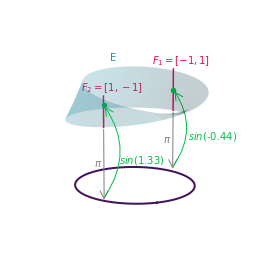

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
make_mobius(ax)
fig.savefig(paper_path/"fbtau", bbox_inches='tight', dpi=200)
